<a href="https://colab.research.google.com/github/Mo7amednumair/pandapower-mn/blob/master/IEEE_European_Low_Voltage_Test_Feeder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEEE European Low Voltage Test Feeder

http://sites.ieee.org/pes-testfeeders/resources/

The current IEEE test cases are focused on North American style systems; however it is common outside of North America to see low-voltage distribution systems, both radial and meshed. It is important to make sure that tools support both dominant styles of distribution system configuration. This test case seeks to fill a benchmark gap by presenting a number of common low-voltage configurations. This circuit also introduces quasi-static time series simulations.

IEEE European LV network is a generic 0.416 kV network serviced by one 0.8 MVA MV/LV transformer and a 11kV external grid. The network supplies 906 LV buses and 55 single phase loads.

**Snapshot of Time series data**

In the benchmark document, there are three snapshots taken from a time series data.

- 12:01 AM : Off Peak(1 min) 
- 09:26 AM : On Peak (566 min)
- 12:00 AM : Off Peak (1440 min)

All the three networks have been saved into pandapower.networks 
We can select them using :

- 'off_peak_1',
- 'on_peak_566',
- 'off_peak_1440'

In [1]:
!pip install pandapower 

import pandapower as pp 
import pandapower.networks as nw



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 KB 4.3 MB/s eta 0:00:00
  Created wheel for pandapower: filename=pandapower-2.11.1-py3-none-any.whl size=6164023 sha256=fcd32e8c77231e82b3ff0a0d58cac29b8e7728ff0b97a8640f08f2e1df8e774f
  Stored in directory: /root/.cache/pip/wheels/99/fe/ca/584068111bdb7efe3e892edbe89505797cc3fe031236bb8aab
Successfully built pandapower


In [2]:
net = nw.ieee_european_lv_asymmetric('on_peak_566')


# Plotting the network

- 11 KV External Grid ( cyan triangle)
- 0.8 MVA 11/0.416 kV Transformer ( Intersecting Circles)
- Loads 
    - Phase A: red triangles, 
    - Phase B: yellow box
    - Phase C: blue circle

**PS:**

**Maximum unbalanced node 0.74% ( Black rectangle in the fig)**

**Max Line Loading 33.10 % ( Black line in the fig)**

<Axes: >

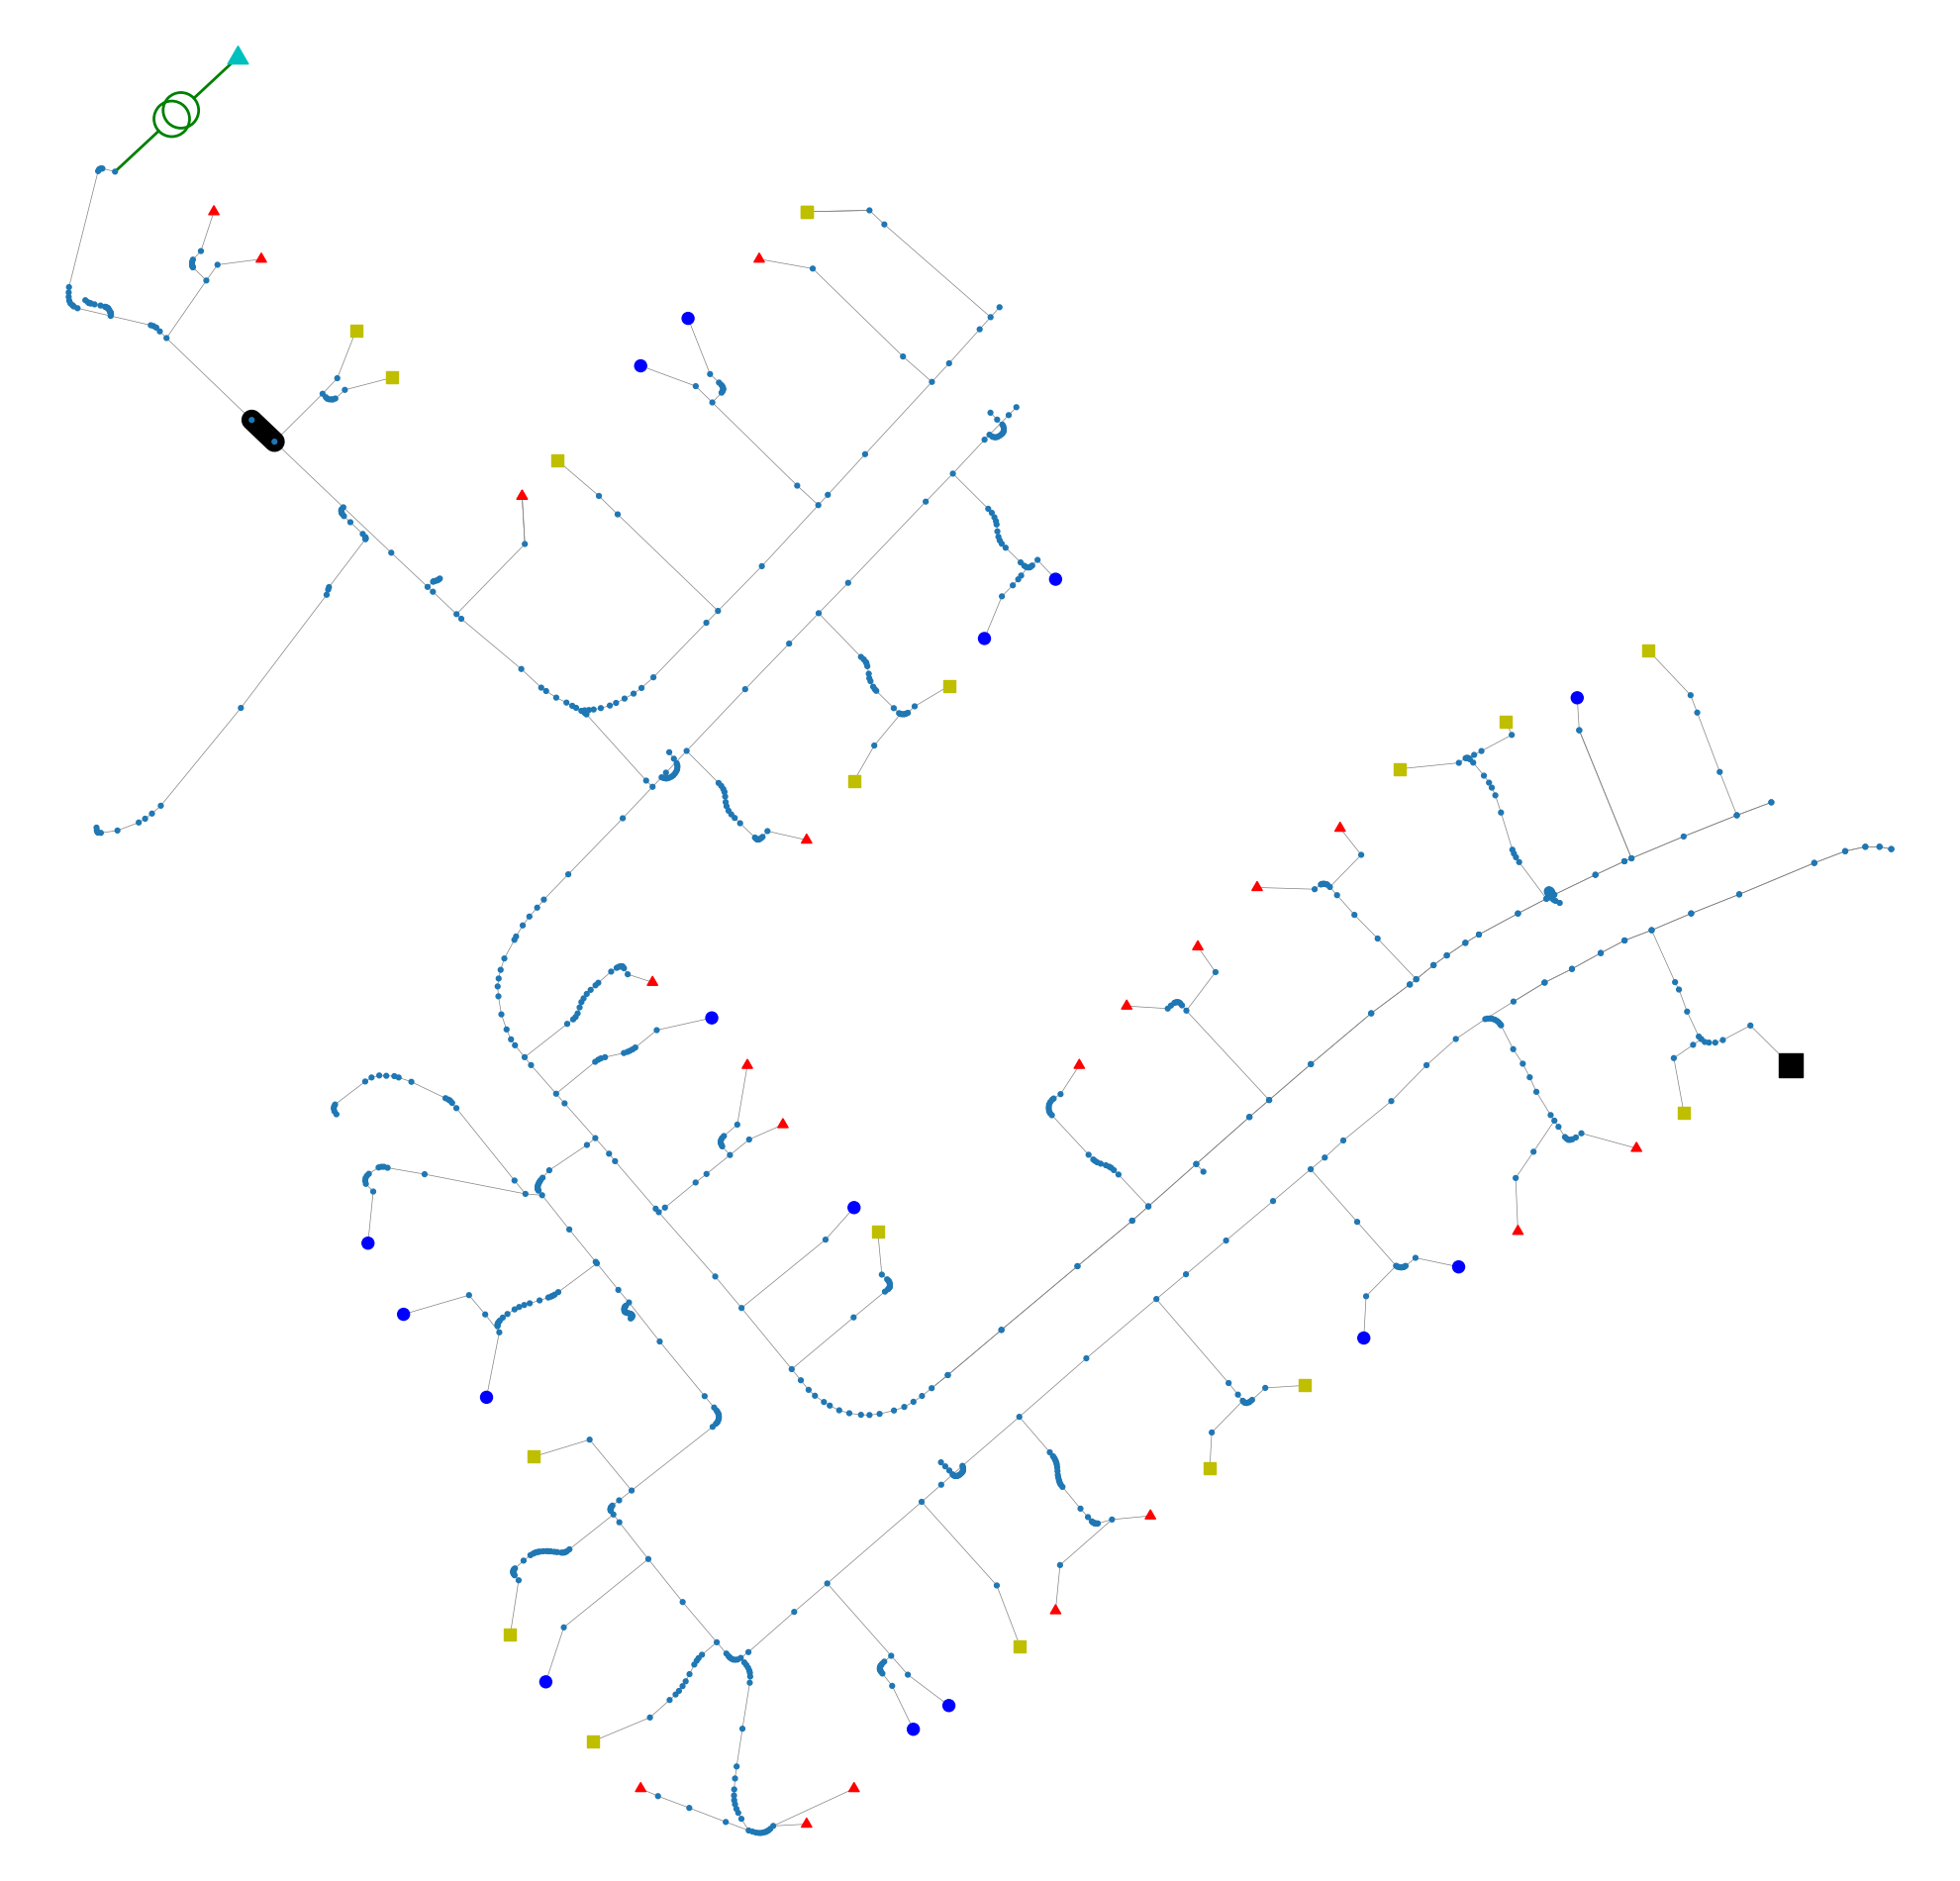

In [5]:
import pandapower.plotting as plot
import numpy as np
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

# Plot all the buses
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)

#Plot Transformers
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g",size =1.5 )

# Plot all the lines
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)

# Plot the external grid
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="poly3", size=1, color="c", zorder=11)

#Plot all the loads
ldA = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_a_mw >0)], patch_type="poly3", size=.5, color="r", zorder=11)
ldB = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_b_mw >0)], patch_type="rect", size=.5, color="y", zorder=11)
ldC = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_c_mw >0)], patch_type="circle", size=.5, color="b", zorder=11)

# Plot the max. loaded line and max. unbalanced node
max_load = plot.create_line_collection(net, np.array([net.res_line_3ph.loading_percent.idxmax()]), color="black", linewidths=15, use_bus_geodata=True)
max_unbal = plot.create_bus_collection(net, np.array([net.res_bus_3ph.unbalance_percent.idxmax()]), patch_type="rect", size=1, color="black", zorder=11)

# Draw all the collected plots
plot.draw_collections([lcd, bc, tlc, tpc, sc,ldA,ldB,ldC,max_load,max_unbal], figsize=(20,20))

In [10]:
net.res_bus_3ph

,vm_a_pu,va_a_degree,vm_b_pu,va_b_degree,vm_c_pu,va_c_degree,p_a_mw,q_a_mvar,p_b_mw,q_b_mvar,p_c_mw,q_c_mvar,unbalance_percent
0,1.050002,0.000001,1.049999,-120.000100,1.049999,120.000099,0.019076,-0.004611,0.025957,4.768463e-03,0.014393,6.038202e-03,0.000201
1,1.049565,-30.144820,1.049250,-150.241722,1.049464,89.927854,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.092089
2,1.049430,-30.133071,1.048787,-150.248470,1.049574,89.921291,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.093576
3,1.049416,-30.131839,1.048739,-150.249178,1.049585,89.920603,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.093747
4,1.049403,-30.130685,1.048693,-150.249841,1.049596,89.919958,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.093910
5,1.049391,-30.129679,1.048654,-150.250419,1.049605,89.919397,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.094055
6,1.049373,-30.128094,1.048591,-150.251330,1.049620,89.918511,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.094286
7,1.048135,-30.020013,1.044343,-150.313621,1.050625,89.858293,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.119271
8,1.048080,-30.015166,1.044152,-150.316423,1.050670,89.855599,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.120723
9,1.048034,-30.011131,1.043994,-150.318755,1.050707,89.853357,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.121948
